This notebook is providing urban analysis for the city of Cape Town.

Analysis documentation available in [this confluence page](https://gfw.atlassian.net/l/cp/gpU4pX8A)

In [1]:
import ee
ee.Authenticate()

Enter verification code:  4/1AdLIrYdpN6d1T4rn2173J2228j7LWrDZ2FTsQ72Cfk5UK9KRnw3K-EdX4XI



Successfully saved authorization token.


In [34]:
import geopandas as gpd
from rasterio.plot import show
import rasterio
import numpy as np 
import rioxarray as rioxa
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
from rasterstats import zonal_stats

# Load city specific data

In [25]:
s3_bucket = 'https://wri-cities-heat.s3.amazonaws.com/'

In [26]:
city_name = "ZAF-Cape_town"

In [27]:
# load city Boundary
city_boundary_path = s3_bucket+city_name+'/processed/admin_boundaries.geojson'
city_boundary = gpd.read_file(city_boundary_path, driver='GeoJSON')
city_boundary

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,City of Cape Town,,47623444B95865124382580,ZAF,ADM2,"MULTIPOLYGON (((18.36898 -33.78984, 18.36787 -..."


In [30]:
# Load city center bounding
city_aoi_path = s3_bucket+city_name+'/processed/area_of_interest.geojson'
city_aoi = gpd.read_file(city_aoi_path, driver='GeoJSON')
city_aoi

,OBJECTID,OFC_SBRB_N,Shape_Leng,Shape_Area,width,height,area,perimeter,geometry
0,720,CAPE TOWN CITY CENTRE,11799.537927,3.247869e+06,2608.2931,2907.1197,7.582620e+06,11030.8256,"POLYGON ((2049594.348 -4019754.815, 2052202.64..."


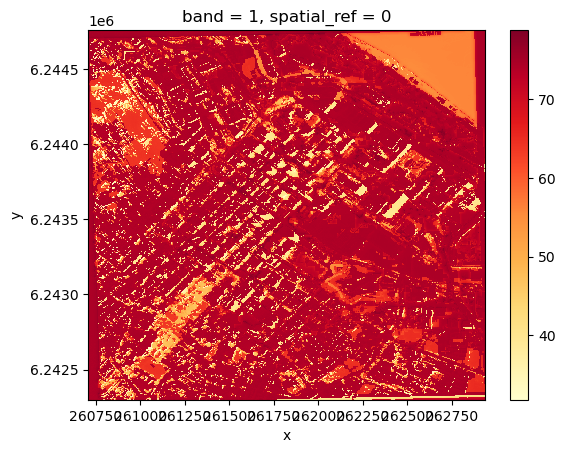

In [41]:
# Load Mean Radiant Temperature
city_mrt_path = s3_bucket+city_name+ '/processed/solweig/Tmrt_2022_22_1400D.tif'
city_mrt = rioxa.open_rasterio(city_mrt_path)
city_mrt.plot(cmap = "YlOrRd")

# Heat profile

## Mean Radiant Temperature

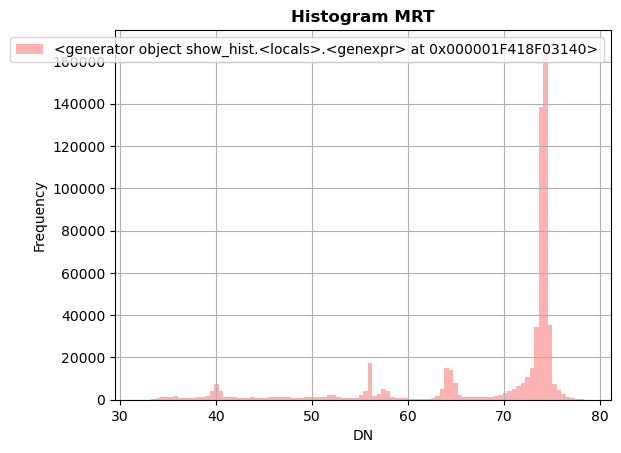

In [18]:
show_hist(city_mrt, bins=100, lw=0.0, stacked=False, alpha=0.3, title="Histogram MRT")
plt.show()

## Land Surface Temperature

# Land Cover profile

## Shade

In [47]:
# load shade data
city_shade_path = s3_bucket+city_name+ '/processed/solweig/Shadow_2022_22_1400D.tif'
city_shade = rioxa.open_rasterio(city_shade_path)
city_shade

<xarray.DataArray (band: 1, y: 820, x: 743)>
[609260 values with dtype=float32]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 2.607e+05 2.607e+05 ... 2.629e+05 2.629e+05
  * y            (y) float64 6.245e+06 6.245e+06 ... 6.242e+06 6.242e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999.0
    scale_factor:   1.0
    add_offset:     0.0

# Explorer Map